## Wrap-up 4

### 1. Statistic Analysis
    a. Distribution functions: Normal (Gaussian) distributions
        i) properties of normal distributions
        ii) test whether a distribution os normal
        iii) propability with normal distributions
    b. Linear correlations
        i) correlation coefficient
    c. Curve fitting
        i) linear fitting
        ii) non-linear fitting
### 2. Time Series Analysis
    a. periodograms
        i) generate plots
        ii) identify leading periodicities
    b. time series decompose
        i) trend (rolling method)
        ii) seasonal
        iii) residule (cyclic + random)
### 3. Simple Mathematical Modeling
    a. SIR-type of model
        i) mathematical equations
        ii) recursive relations
        iii) for-loop implementation      
        

### 1.a Normal (Gaussian) distributions 

- The mathematical form for a normal distribution is:

$$P=f(x,\mu, \sigma)= \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},-\infty < x < \infty$$

We can put this equation into a lambda function called **Normal** and work on it as before with one small modification.  We can write the Normal _lambda_ function such that it returns an array if $x$ is passed as an array. 

- Key Properties of Normal distributions in Statistics
    1) Mean = Median

    2) the standard deviation includes ~67% of the data (not 95%), that would be 1.97$\sigma$ (or 2-sigma, informally).  The $\pm \sigma$ bounds are the dashed lines in the above plot.  

    3) the mean of our sample is generally not the same as the mean of the distribution ($\bar x \ne \mu$).  In fact, the 95% confidence bounds for the MEAN is related to the 'standard error', which is:

$$s_e = \frac {s}{\sqrt N}$$.


- The 95% confidence bounds for the mean is given by 1.97$s_e$.  This means in practice that the mean will be more than 1.97$s_e$ away from true mean 5% of the time.  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Normal(x,mu,sigma):
    """
    Normal Distribution Function
    """
    Prob = (1./(sigma*np.sqrt(2.**np.pi)))*np.e**(-(x-mu)**2/(2.*sigma**2))
    return Prob

To test whether a dataset follows a Normal distribution, use:

Index(['A', 'B', 'C', 'D', 'Left Skew', 'Multimodal', 'IQ20', 'IQ100'], dtype='object')
The mean of the dataset A is 50.6
The median of the dataset A is 50.7
The standard deviation of the dataset A is 5.1


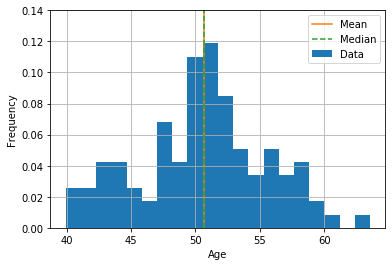

In [6]:
df = pd.read_csv('../Datasets/histgr.csv') # load the data set

print(df.columns) # print out the column names - understanding your data set

df['A'].hist(bins=20,density=True,label='Data') # make a histogram with 20 bins

print('The mean of the dataset A is', '%3.1f'%(df.A.mean())) # print out mean
print('The median of the dataset A is', '%3.1f'%(df.A.median())) # print out median
print('The standard deviation of the dataset A is', '%3.1f'%(df.A.std())) # print out median

plt.plot([df.A.mean(),df.A.mean()],[0,0.14],label='Mean')
plt.plot([df.A.median(),df.A.median()],[0,0.14],'--',label='Median')

plt.ylim([0,0.14])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()


In [7]:
from scipy import stats

k2, p = stats.normaltest(df.A.dropna())

print('For distributon A, the p value is ', p)

if p > 0.05:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

For distributon A, the p value is  0.8328983767345228
Sample looks Gaussian


### 1.b Linear Correlations

_Pearson_ (linear) is the most widely used correlation coefficient. The mathematical formula for correlation, developed by Pearson himself, uses raw data and the means of two variables, $X$ and $Y$:

$$\rho_{X,Y} = \frac{\Sigma(X_i-\mu_X)(Y_i-\mu_Y)}{\sqrt{\Sigma(X_i-\mu_X)^2\Sigma(Y_i-\mu_Y)^2}}$$ 

In this formulation, raw observations are centered by subtracting their means and **re-scaled** by a measure of standard deviations. In other words, $\rho_{X,Y}$ is called "**Dimensionless**". Now we can compare between different data sets.

In python, simply use the .corr() function to compute the linear correlation:


In [9]:
file = "../Datasets/mangkhut.xlsx" # file name and location
mg = pd.read_excel(file) # load file into pandas data frame
mg.head() # print the head()

,Year,Month,Day,Hour,Lat,Long,Pressure (hPa),Wind (kt),Class
0,2018,9,6,12,11.8,170.2,1008,0,2
1,2018,9,6,18,12.0,169.2,1008,0,2
2,2018,9,7,0,12.0,167.8,1008,0,2
3,2018,9,7,6,12.3,166.6,1006,0,2
4,2018,9,7,12,12.7,165.4,1000,35,3


In [13]:
c1 = mg['Wind (kt)'].corr(mg['Class'])
print('The correlation coefficient between "Wind Speed" and "Class" is', c1)

The correlation coefficient between "Wind Speed" and "Class" is 0.9285061717191158


or we can use the corr() function to compute the correlation coefficients at once

In [14]:
mg.drop(['Year', 'Month', 'Day', 'Hour'], axis=1).corr()

,Lat,Long,Pressure (hPa),Wind (kt),Class
Lat,1.000000,-0.868939,0.152296,-0.157017,-0.070297
Long,-0.868939,1.000000,0.333150,-0.282290,-0.278296
Pressure (hPa),0.152296,0.333150,1.000000,-0.947636,-0.803968
Wind (kt),-0.157017,-0.282290,-0.947636,1.000000,0.928506
Class,-0.070297,-0.278296,-0.803968,0.928506,1.000000


### 1.b Curve Fitting

- linear model

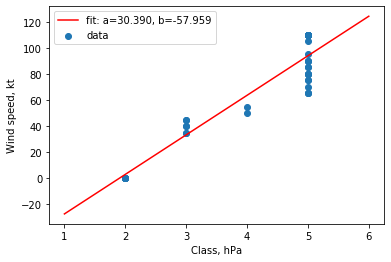

In [22]:
from scipy.optimize import curve_fit # import function curve_fit

# define a linear function
def func_linear(x, a, b):
    return a *x + b

# linear fit
popt, pcov = curve_fit(func_linear, mg['Class'], mg['Wind (kt)'])

plt.scatter(mg['Class'], mg['Wind (kt)'],label='data') # make a plot showing the relationship between gradP and Wind
plt.xlabel('Class, hPa')
plt.ylabel('Wind speed, kt')

x=np.linspace(1,6,50)

plt.plot(x, func_linear(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()

- non-linear model: similar to the linear model, but more problem dependent (go to the Covid-19 pandemic analysis on non-linear curve fitting examples)

### 2.a Periodograms

- **Signal**: datasets in the time domain (varies as a function of time)

- **Spectrum**: the magnigude of each wave component as a function of the corresponding frequency is called a **spectrum**, it gives you a sense of the relative magnitudes between different frequency components within a singal.

- **Power Spectrum**: the power (or energy density) of each wave component as a function of the corresponding frequency is called a **power spectrum**, it gives you a sense of the power of each freqeuency component with in a signal, which is also known as a **periodogram**

To compute a periodogram for a time series, use the following example:

In [24]:
# Read in the datafile into a Pandas DataFrame
cycles=pd.read_csv('../Datasets/INSOLN.LA2004.BTL.100.csv')
print (cycles.columns)
cycles.head()

Index(['Age (ka)', 'Eccentricity', 'Obliquity', 'Precession'], dtype='object')


,Age (ka),Eccentricity,Obliquity,Precession
0,0,0.016702,0.409093,1.796257
1,1,0.017161,0.411353,1.497928
2,2,0.017497,0.413555,1.200024
3,3,0.017846,0.415639,0.903494
4,4,0.018211,0.417555,0.611381


Text(0, 0.5, 'Eccentricity')

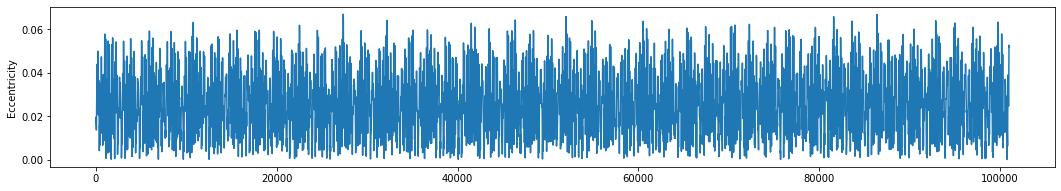

In [29]:
cycles_1Ma=cycles #Here i'm using all the eccentricity data (in the class example we used <1000 ka data)  

# set up the plot as three rows
# start with Eccentricity
fig=plt.figure(1,(18,10)) # make a nice big plot
fig.add_subplot(311) # notice how you do not need the commas!
plt.plot(cycles_1Ma['Age (ka)'],cycles_1Ma['Eccentricity'])
plt.ylabel('Eccentricity')

(0, 0.0125)

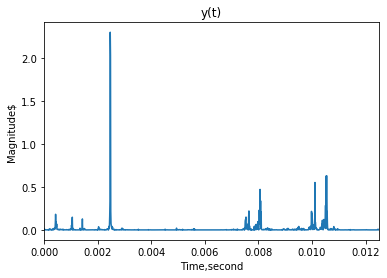

In [41]:
from scipy import signal # import the scipy.signal module

ecce=np.array(cycles_1Ma['Eccentricity'])
time = np.array(cycles_1Ma['Age (ka)'])
fs = 1/(time[1]-time[0])

# and calculate the frequencies 
freq,power=signal.periodogram(ecce,fs)

# plot
plt.plot(freq,power)
plt.xlabel('Time,second')
plt.ylabel('Magnitude$')
plt.title('y(t)')
#plt.ylim([1e-6,1])
plt.xlim([0,0.0125])

so the eccentricity has about three peak frequency modes around 0.0025, 0.008 and 0.01, corresponding to 400, 125 and 100 ka periodicities. Pay attention to the relationship between $f_s$ and $\Delta T$:

$$f_s = \frac{1}{\Delta T} = \frac{1}{T[1]-T[0]}$$

Here in the **signal.periodogram(ecce,fs)** function, if the **fs** is calculated using the above way, then the output frequencies (freq) in the above example will have the unit of $1/\Delta T$, in the example problem it's 1/ka

### 2.b Time series decompose

- calculate the "trend" using the pandas.rolling() method
    - key idea: the rolling method uses a moving average through the time series, thus the size of the moving average window determines whether the seasonal variations (or faster ones) are eliminated (why?)

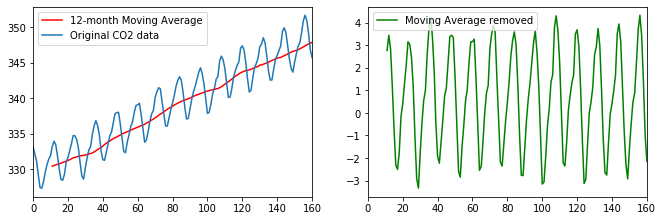

In [47]:
data = pd.read_excel('../Datasets/Monthly_CO2_Concentrations.xlsx')
data['CO2M']=data['CO2'].rolling(12).mean()

plt.figure(figsize=(5.5*2, 3.5))
plt.subplot(1,2,1)
data['CO2M'].plot(color='r',label='12-month Moving Average')
data['CO2'].plot(label='Original CO2 data')
plt.legend()

plt.subplot(1,2,2)
(data.CO2-data['CO2M']).plot(color='g',label='Moving Average removed')
plt.legend()

You can see the effect of changing rolling window:

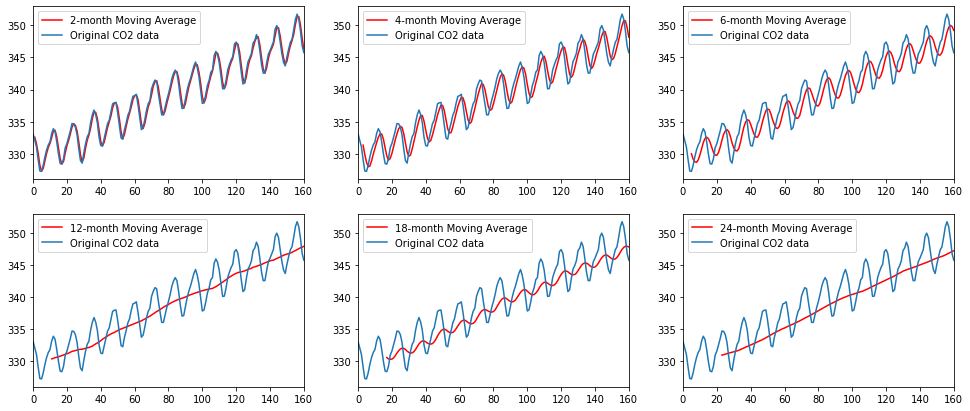

In [54]:
plt.figure(figsize=(5.5*3, 3.5*2))
k=1 # index of subplot

for mw in [2,4,6,12,18,24]:
    
    data['CO2M']=data['CO2'].rolling(mw).mean()# running mean

    plt.subplot(2,3,k) # current subplot
    data['CO2M'].plot(color='r',label=str(mw)+'-month Moving Average')
    data['CO2'].plot(label='Original CO2 data')
    k = k+1 # move to the next subplot
    plt.legend()

- calculate the components of a time series using the decompose() function

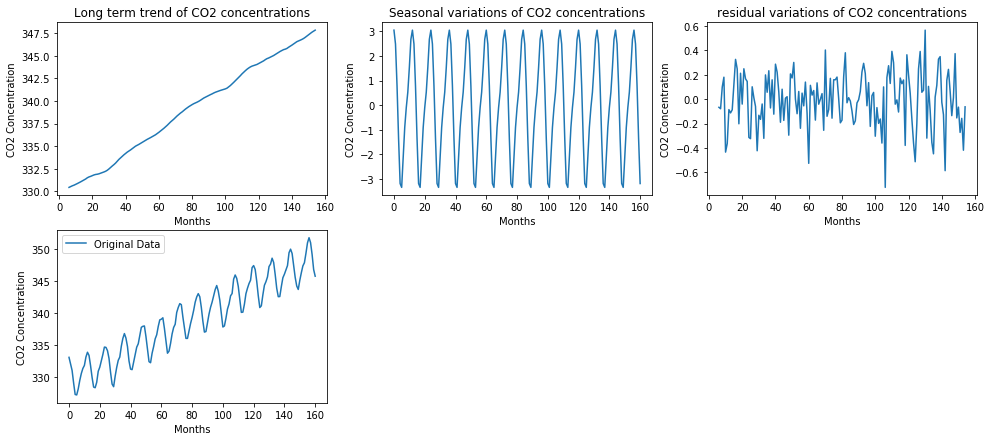

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data.CO2.tolist(), freq=12,model='additive')

plt.figure(figsize=(5.5*3, 3.5*2))
plt.subplot(2,3,1)
plt.plot(result.trend)
plt.xlabel('Months')
plt.ylabel('CO2 Concentration')
plt.title('Long term trend of CO2 concentrations')

plt.subplot(2,3,2)
plt.plot(result.seasonal)
plt.xlabel('Months')
plt.ylabel('CO2 Concentration')
plt.title('Seasonal variations of CO2 concentrations')

plt.subplot(2,3,3)
plt.plot(result.resid)
plt.xlabel('Months')
plt.ylabel('CO2 Concentration')
plt.title('residual variations of CO2 concentrations')

plt.subplot(2,3,4)
plt.plot(result.observed,label='Original Data')
plt.xlabel('Months')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

combined with curve fitting technique to get the seasonal variations:

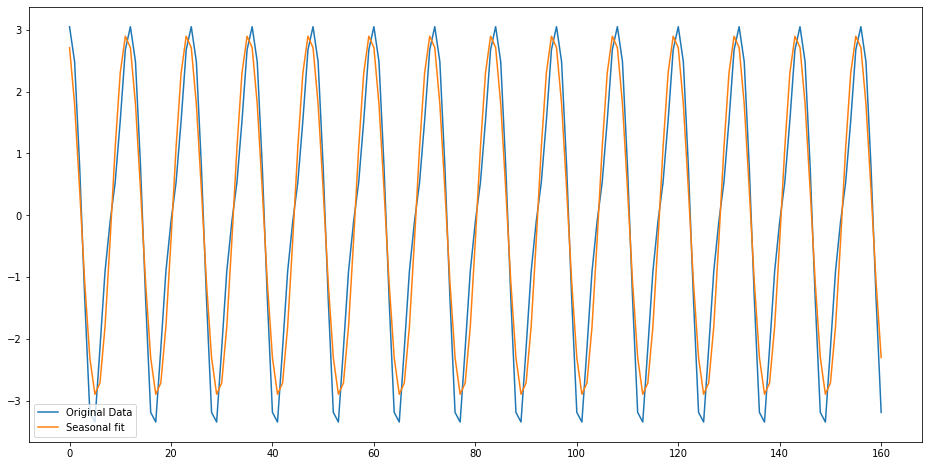

In [85]:
# define a linear function
def func_linear(x, a, b,c):
    return a *np.cos(c*x + b)

season = result.seasonal
time = np.arange(season.size)
popt, pcov = curve_fit(func_linear,time,season,p0=[3,0,2*np.pi/12]) # here why c = 2*pi/12? because we know seasonal variation has a period of 12 months

plt.figure(1,(16,8))
plt.plot(result.seasonal,label='Original Data')
plt.plot(time,func_linear(time,*popt),label='Seasonal fit')
plt.legend()